# [SWCON253] Machine Learning
Teaching Assistant: Hyundong Cho (gusehd1113@khu.ac.kr)

Professor: Jinwoo Choi (jinwoochoi@khu.ac.kr)

---

# 총 15점

# P6.A:  GMM을 이용한 밀도추정 (10점)

### 학습목표
- GMM 모델을 이용하여 밀도추정을 할 수 있다.
- Scikit-Learn을 이용하여 모델 학습을 구현할 수 있다.

### 실습내용
Scikit-Learn의 GMM을 이용하여 군집화를 학습해 봅니다.  
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- Imports
- 1) 데이터 생성
- 2) GMM 모델 구현, 학습, Centroids, Density Contour 시각화 **<직접 구현>**
- 3) GMM에서의 Covariance matrix 분석과  type (제약 조건)에 따른 클러스터 모양 시각화
- 4) Discussion **<작성>**

**이번 실습에서 여러분은 `2)` 부분의 코드와 `3)`을 직접 작성합니다.**

### 점수
- 코드 작성: 8점, `#<your code>` 한 부분 마다 2점.
- Discussion 작성: 2점

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from matplotlib.colors import LogNorm
%matplotlib inline

## 1) 데이터 생성
랜덤하게 데이터를 생성하며 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화합니다.

In [6]:
# 데이터 생성
X1, y1 = make_blobs(n_samples=1000, centers=((5, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.37, 0.95], [0.73, 0.6]]))
X2, y2 = make_blobs(n_samples=500, centers=1, random_state=42)
X = np.r_[X1, X2]
X[:, [0, 1]] = X[:, [1, 0]]

#데이터를 훈련 데이터와 테스트 데이터로 분류
# X_test는 P5.B에서 사용
X_train, X_test = train_test_split(X, test_size=0.1)

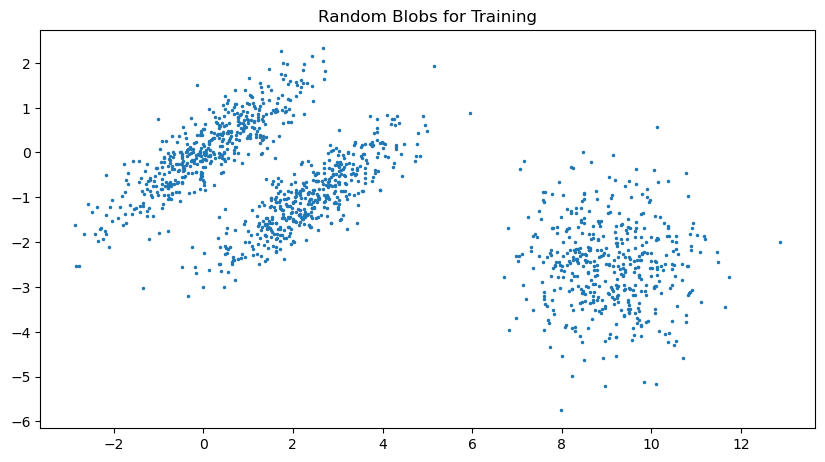

In [8]:
# 훈련 데이터 plot
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=3)
plt.title('Random Blobs for Training')
plt.show() 

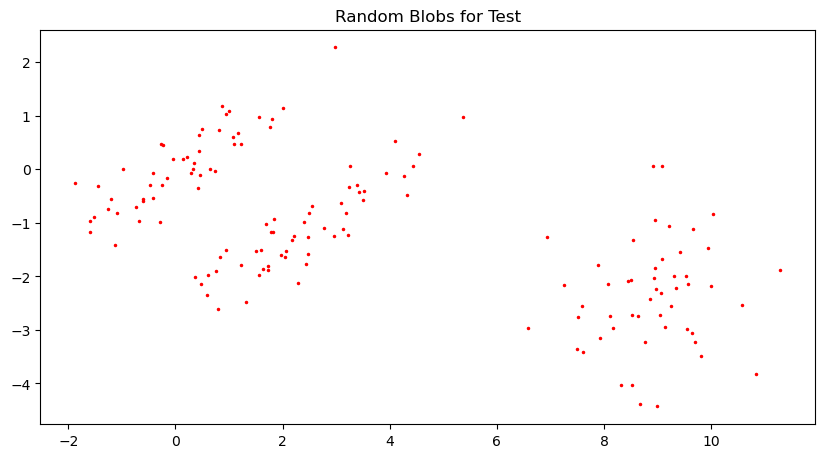

In [10]:
# 테스트 데이터 plot
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
plt.plot(X_test[:, 0], X_test[:, 1], '.', markersize=3, color='r')
plt.title('Random Blobs for Test')
plt.show() 

## 2) GMM 모델 구현, 학습, 시각화

 - Scikit-Learn의 `GaussianMixture` 클래스를 이용하여 GMM을 생성하고 `fit` 함수를 이용하여 학습해 봅니다.  
 - GaussianMixture의 `n_components`를 이용하면 군집의 갯수를 정할 수 있습니다. 이번 실습에서는 3개로 합니다.  
 - 또한, GMM을 생성할 때 하이퍼파라메터인 `n_init`을 10으로 설정해주세요

In [14]:
gmm = GaussianMixture(n_components=3, n_init=10, random_state=42)

# <your code> 훈련 데이터(X_train)를 이용하여 학습
gmm.fit(X_train)

C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

GaussianMixture(n_components=3, n_init=10, random_state=42)

이제 학습된 GMM 모델을 이용하여 다음 정보들을 획득할 수 있습니다.

**1. Centriods (군집 중심)**
 
**2. Density Contour (밀도 등고선)**
 
이어지는 셀들에서 이러한 정보들을 시각화합니다.

이때, GaussianMixture 클래스의 함수와 attributes를 이용합니다. 

- `GaussianMixture.means_`: returns Centroids
- `GaussianMixture.score_samples(array)`: returns log-likelihoods (for each sample)

(주의: 위의 셀에서 학습이 끝난 gmm 객체를 이후 모든 셀에서 이용합니다.)

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

**1) Centroids (군집 중심) 시각화**
- GMM 클래스로부터 군집 중심을 반환하여 시각화합니다. 

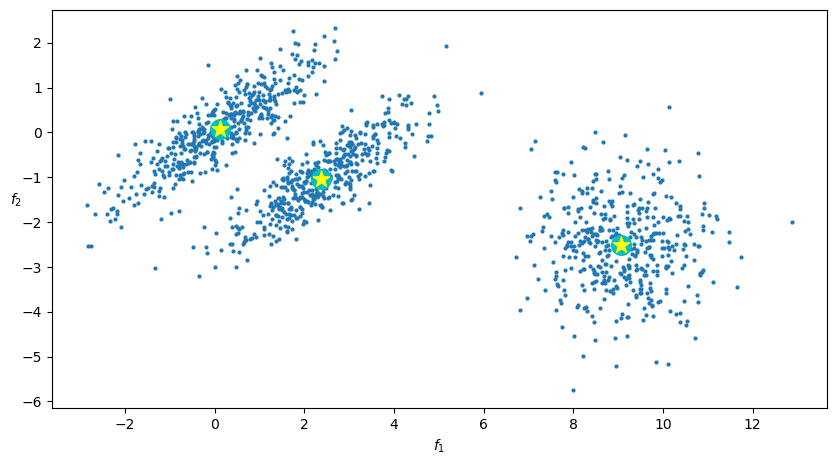

In [18]:
def visualization_centroids(gmm):
    # Centroids 시각화
    centroids = gmm.means_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, linewidths=1, color='c', zorder=10) 
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=150, linewidths=1, color='yellow', zorder=11) 

    
# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')
    
# Centroids
visualization_centroids(gmm)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

**2. Density Contour (밀도 등고선) 시각화**
- 밀도 등고선을 시각화하기 위해 2차원 평면공간에 촘촘한 격자점을 생성합니다.
- GMM 클래스로부터 격자점들의 위치에서의 **log-likelihoods** 를 반환하여 확률 밀도로써 사용합니다.
- matplotlib에서 지원하는 contourf 함수를 이용하여 밀도 등고선을 시각화합니다.

**주의**: GMM 클래스가 반환하는 log-likelihoods에서 likelihoods는 GMM이 가지고 있는 가우시안 분포들의 각각의 likelihoods가 아닌, 최종 가충 합으로 계산된 likelihoods 입니다.

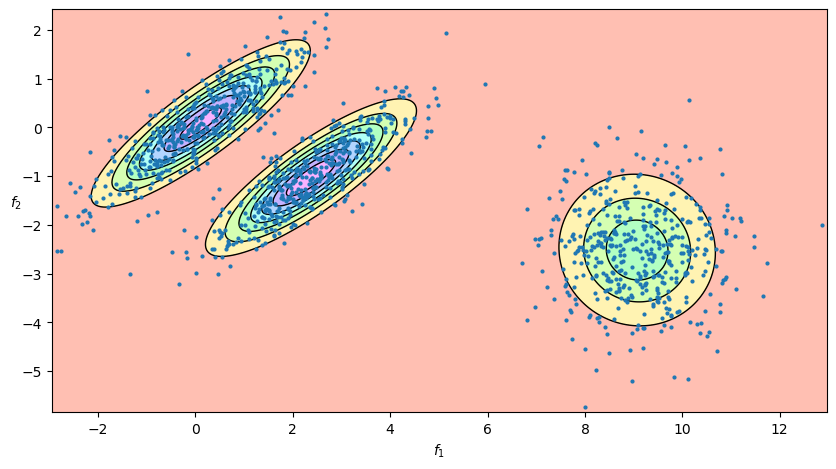

In [21]:
def visualization_contour(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # densities (log-likelihoods) 
    log_likelihoods = gmm.score_samples(plane)
    densities = np.exp(log_likelihoods)

    densities = np.abs(densities.reshape(x.shape))
    cntr = plt.contourf(x, y, densities, levels=10, alpha=0.3, cmap='gist_rainbow')
    plt.contour(x, y, densities, levels=10, linewidths=1, colors='k')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

## 3) GMM에서의 Covariance matrix 분석과  type (제약 조건)에 따른 클러스터 모양 시각화

GMM을 충분히 학습시키고 나면, GMM에 포함된 각 가우시안 분포에 해당하는 Covariance matrix를 확인할 수 있습니다.

예를 들어, 현재 학습된 GMM 모델의 Covariance matrix는 다음과 같습니다.


In [25]:
covariances = gmm.covariances_
print('Covariance matrix 1\n', covariances[0],
     '\n\nCovariance matrix 2\n', covariances[1],
      '\n\nCovariance matrix 3\n', covariances[2])

Covariance matrix 1
 [[1.14087951 0.72298523]
 [0.72298523 0.63655018]] 

Covariance matrix 2
 [[ 0.9913416 -0.0357503]
 [-0.0357503  0.9315873]] 

Covariance matrix 3
 [[1.25464643 0.8337332 ]
 [0.8337332  0.73174419]]


앞선 셀에서 학습한 GMM의 Covariance는 아무런 제약 조건이 없지만(default), 제약 조건을 추가하여 Covariancce를 학습할 수 있습니다.

이어지는 셀에서는 GMM 모델을 생성할 때 Covariance type를 다른 type ('tied', 'diag')로 바꾸어 학습하여 클러스터의 모양이 어떻게 변하는지 확인합니다.

**Covariance type: Tied**

C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

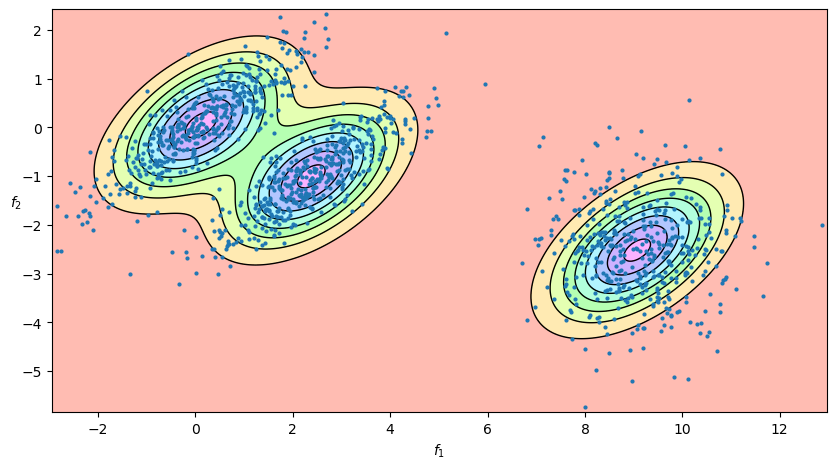

In [29]:
gmm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type='tied')
gmm_tied.fit(X_train)

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm_tied)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

**Covariance type: diag**

C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\WHK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with M

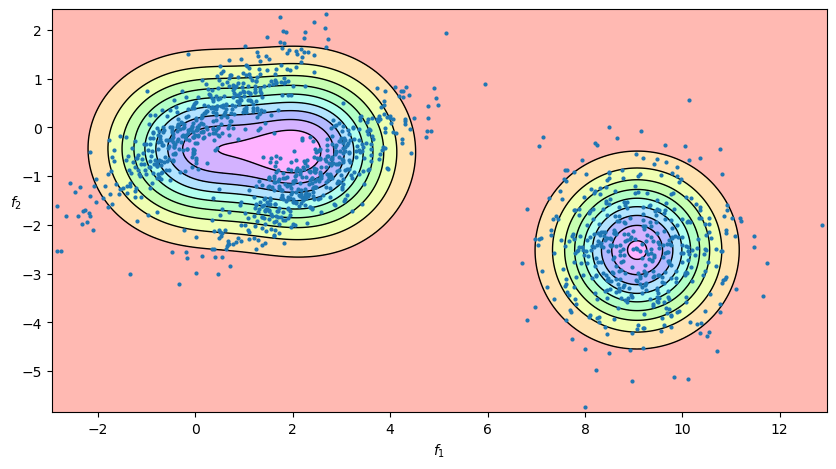

In [32]:
gmm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type='diag')
gmm_diag.fit(X_train) 

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# contour 
visualization_contour(gmm_diag)

# 축 이름 설정
plt.xlabel("$f_1$")
plt.ylabel("$f_2$", rotation=0)

# X_train 데이터 시각화
plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.show()

---

## 4) Discussion (각 0.5점)

**1) 모수적 밀도추정과 비모수적 밀도추정을 비교하여 설명하세요.**

[답변작성]     
모수적 밀도추정은 데이터가 정규분포와 같은 식이 존재하는 분포를 따른다고 가정하고 그 분포의 파라미터를 추정하여 밀도를 추정하는 방식이다. 따라서 주어진 식에 넣고 계산하면 되기 때문에 계산을 효율적으로 할 수 있다. 다만, 실제로 그 값이 아닐 경우에는 결과가 왜곡되어 나타날 것이다.         
비모수적 밀도추정은 데이터 분포에 대한 가정이 없고, 데이터 자체를 기반으로 밀도를 추정한다. 그래서 분포를 가정하지 않아서 많은 계산과 데이터를 요구한다. 다만, 왜곡되지 않고 주어진 분포에 따라서 추정한다는 장점이 있다.

**2) EM 알고리즘을 이용한 GMM 밀도추정 방법에 대해  설명하세요.**

[답변작성]      
EM 알고리즘은 관측 데이터를 이용해서 GMM의 mean, variance등을 최적화한다. Expectaion 단계에서는 군집할당확률을 계산하고, 각 데이터가 gaussian component에 속할 확률을 추정한다. Maximization 단계에서는 위의 계산 값을 기반으로 GMM parameter를 업데이트한다. 이 과정을 수렴할 때까지 반복한다. 

**3) K-means를 이용한 군집화와 GMM을 이용한 밀도추정 기반의 군집화의 차이에 대해 설명하세요.**

[답변작성]     
K-means를 이용한 군집화 과정은 군집 중심을 찾고 가장 가까운 군집중심을 유클리드 거리를 통해서 계산한다. 이 경우에는 데이터의 경계가 직선으로 나타난다.       
GMM을 이용한 경우에는 가우시안 확률 밀도를 기반으로 한다. 즉, 각 gaussian component에 속할 확률로 할당되기 때문에, 군집의 경계가 확률 기반으로 부드럽게 나타난다. 

**4) 앞서 학습된 GMM의 Covariance matrix들을 출력해보았습니다. 출력된 각 Covariance matrix (cluster1~3)의 값과 시각화한 밀도 등고선의 모양을 연결지어 설명해보세요.**

[답변작성]      
cluster1의 covariance matrix는 대각 성분이 크고 비대각 성분이 0에 가깝다. 따라서 이것은 원형에 가까운 타원을 생성한다. cluster 2도 1과 유사하지만 대각 성분이 좀 더 작다. 그래서 x,y축으로 덜 퍼져있다. 따라서 좀 더 작은 형태에 원형에 가까운 타원을 만든다. cluster3의 경우에는 covariance matrix의 비대각 성분이 1에 가깝다. 이것이 타원이 기울어지게 만든다. 

---

# P6.B: 학습한 GMM (P6.A의 결과)를 이용한 새로운 샘플(Test) 분류 (3점)
### 학습목표
- 학습한 GMM 모델을 이용하여 새로운 데이터를 분류할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 학습된 GMM을 이용하여 클래스 분류 **<직접 구현>** 
- 2) 결정 경계 시각화

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.

### 점수
- 코드 작성: 3점, `#<your code>`

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

## 1) 학습된 GMM을 이용하여 클래스 분류

- 새로운 샘플 (test dataset)이 어느 군집에 속해있는지 분류합니다.
- GaussianMixture.predict(array) 함수를 이용합니다.

훈련 데이터로 학습한 GMM을 새로운 샘플들 (Test dataset)에 대한 분류를 진행합니다. 

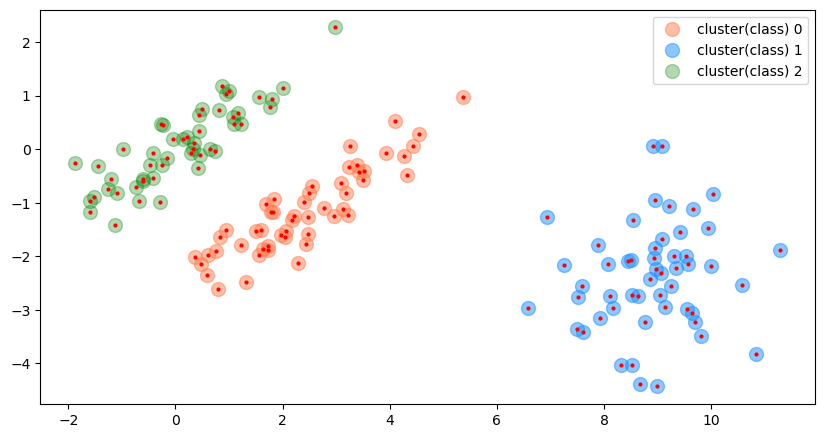

In [35]:
def classification(gmm):
    y = gmm.predict(X_test)

    # 테스트 데이터에 대해 Class 분류
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 0], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 0],
                label='cluster(class) 0', marker='o', color='coral', alpha=0.5, s=100)
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 1], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 1],
                label='cluster(class) 1', marker='o', color='dodgerblue', alpha=0.5, s=100)
    plt.scatter([i[0] for idx, i in enumerate(X_test) if y[idx] == 2], 
                [i[1] for idx, i in enumerate(X_test) if y[idx] == 2],
                label='cluster(class) 2', marker='o', color='green', alpha=0.3, s=100)


# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 테스트 데이터셋의 샘플 분류
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.r', markersize=4)
plt.legend()
plt.show()

## 2) 결정 경계 시각화

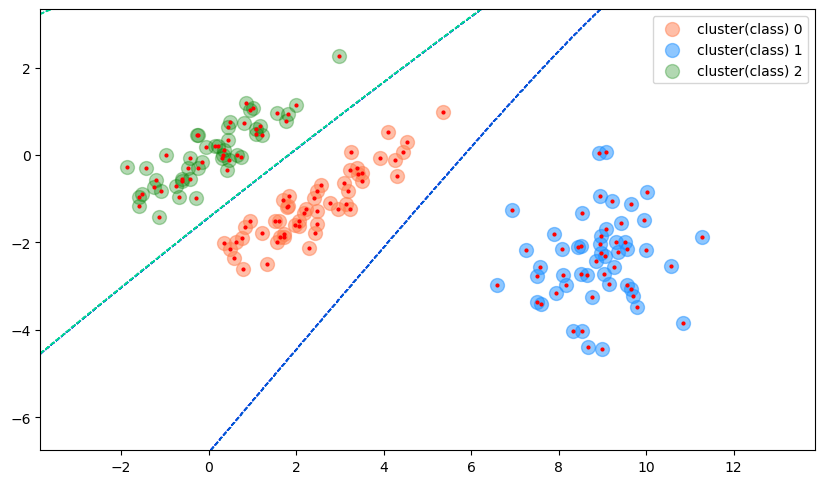

In [38]:
def visualization_decision_boundary(gmm):
    # 2차원 평면 공간 격자점 Array 생성
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x, y = np.meshgrid(np.linspace(mins[0], maxs[0], num=1000),np.linspace(mins[1], maxs[1], num=1000))
    plane = np.c_[x.ravel(), y.ravel()]

    # 결정 경계 시각화
    Z = gmm.predict(plane)
    Z = Z.reshape(x.shape)
    plt.contour(x, y, Z, linewidths=1, cmap='winter', linestyles='dashed')

# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')

# 위에서 진행한 분류 및 시각화
classification(gmm)
plt.plot(X_test[:, 0], X_test[:, 1], '.r', markersize=4)
plt.legend()

# 결정 경계 시각화
visualization_decision_boundary(gmm)
plt.show()

# P6.C: 학습한 GMM (P6.A의 결과)를 이용한 이상치 탐지 (2점)
### 학습목표
- 학습한 GMM 모델을 이용하여 이상치 탐지를 할 수 있다.

### 실습내용
Scikit-Learn에서 Gaussian Mixture 클래스 사용법을 제공하니 아래 링크를 참고하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

실습은 다음 순서로 진행됩니다.
- 1) 밀도 임계값 지정 **<직접 구현>**
- 2) 이상치 시각화 

**이번 실습에서 여러분은 `1)` 부분의 코드를 직접 작성합니다.**

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.


### 점수
- 모델 작성: 2점, `#<your code>` 한 부분 마다 1점.

`.ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.`

#### Outlier
![Outlier](https://miro.medium.com/max/1400/1*w5HzgB5ekxQ6Nwmx5ggn8Q.jpeg)

GMM을 이상치 탐지에 사용할 수 있습니다. 밀도가 낮은 지역에 있는 샘플을 이상치로 생각할 수 있습니다. 예를 들어 결함 제품의 비율이 4%라고 하면 밀도 임곗값을 이 값으로 지정하여 임계 밀도보다 낮은 지역에 있는 샘플을 얻을 수 있습니다.

## 1) 밀도 임계값 지정

- **학습 데이터**의 이상치 탐지를 위해 각 샘플에 대한 확률 밀도 **(log-likelihoods)** 를 구합니다. (**GaussianMixture.score_samples()** 함수 이용)
- **np.percentile(array, n)** 함수를 이용하여 입력 array의 성분 값들 중 n percentile (n% 이하의 값에 대한 경곗값)를 반환합니다.
- 본 실습에서는 n=4 를 이용합니다.

In [44]:
densities = np.exp(gmm.score_samples(X_train))

# 밀도 임계값 지정
threshold = np.percentile(densities, 4)

# threshold 보다 작은 확률 밀도를 가진 샘플을 이상치로 탐지
anomalies = X_train[densities < threshold]

## 2) 이상치 시각화

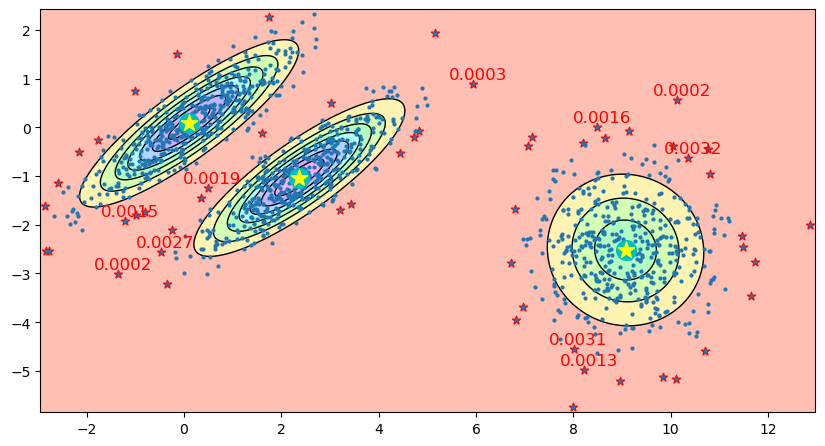

In [47]:
def visualization_likelihood(i):
    posX, posY = anomalies[i][0]-0.5, anomalies[i][1]+0.1
    likelihood = round(np.exp(gmm.score_samples(anomalies[i].reshape(1, -1)))[0].item(), 4)
    plt.text(posX, posY, f'{likelihood}', fontdict={'size': 12}, color='red')


# Figure 생성
plt.figure(figsize=(10, 10))
plt.axes().set_aspect('equal')


visualization_centroids(gmm)
visualization_contour(gmm)

# visualization likelihoods (10 samples)
for i in range(10):
    visualization_likelihood(i)

plt.plot(X_train[:, 0], X_train[:, 1], '.', markersize=4)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()